In [1]:
%matplotlib inline
import csv
import sys
import os
import math
import cmath
import numpy as np
import pandas as pd
from rdp import rdp
import xlrd
from xlutils.copy import copy


from matplotlib import pyplot as plt

In [2]:

def cal_ang(point_1, point_2, point_3):
    """
    根据三点坐标计算夹角
    :param point_1: 点1坐标
    :param point_2: 点2坐标
    :param point_3: 点3坐标
    :return: 返回任意角的夹角值，这里只是返回点2的夹角
    """
    a=math.sqrt((point_2[0]-point_3[0])*(point_2[0]-point_3[0])+(point_2[1]-point_3[1])*(point_2[1] - point_3[1]))
    b=math.sqrt((point_1[0]-point_3[0])*(point_1[0]-point_3[0])+(point_1[1]-point_3[1])*(point_1[1] - point_3[1]))
    c=math.sqrt((point_1[0]-point_2[0])*(point_1[0]-point_2[0])+(point_1[1]-point_2[1])*(point_1[1]-point_2[1]))
    A=math.degrees(math.acos((a*a-b*b-c*c)/(-2*b*c)))
    B=math.degrees(math.acos((b*b-a*a-c*c)/(-2*a*c)))
    C=math.degrees(math.acos((c*c-a*a-b*b)/(-2*a*b)))
#     if(B == 18.43494882292197):
#         print(point_1, point_2, point_3)
#         sys.exit()
    # 返回值保留小数点后5位
    return round(B), round(B,6)

cal_ang((0,0), (0,1), (1,0))

(45, 45.0)

In [67]:
# 打开文件
workbook = xlrd.open_workbook('match.xlsx')

# 查看工作表
print("sheets：" + str(workbook.sheet_names()))
# 通过文件名获得工作表,获取工作表1
table = workbook.sheet_by_name('无遮挡')
myDict = {}
for i in range(1, len(table.col_values(0))):
    myDict[table.col_values(0)[i]] = table.col_values(2)[i]
for keys,values in myDict.items():
    print(keys, values)

sheets：['无遮挡', '遮挡']
SSSM-000002 1.0
SSSM-000008 0.0
SSSM-000014 1.0
SSSM-000020 1.0
SSSM-000026 1.0
SSSM-000032 0.0
SSSM-000038 1.0
SSSM-000044 1.0
SSSM-000050 1.0
SSSM-000056 1.0
SSSM-000062 1.0
SSSM-000068 1.0
SSSM-000074 0.0
SSSM-000080 0.0
SSSM-000086 0.0
SSSM-000092 1.0
SSSM-000098 1.0
SSSM-000104 1.0
SSSM-000110 1.0
SSSM-000116 1.0
SSSM-000122 1.0
SSSM-000128 1.0
SSSM-000134 1.0
SSSM-000140 1.0
SSSM-000146 1.0
SSSM-000152 1.0
SSSM-000158 1.0
SSSM-000164 1.0
SSSM-000170 1.0
SSSM-000176 1.0
SSSM-000182 1.0
SSSM-000188 1.0
SSSM-000194 1.0
SSSM-000200 1.0
SSSM-000206 1.0
SSSM-000212 0.0
SSSM-000218 0.0
SSSM-000224 0.0
SSSM-000230 0.0
SSSM-000236 0.0
SSSM-000242 1.0
SSSM-000248 1.0
SSSM-000254 0.0
SSSM-000260 1.0
SSSM-000266 1.0
SSSM-000272 1.0
SSSM-000278 1.0
SSSM-000284 1.0
SSSM-000290 0.0
SSSM-000296 1.0
SSSM-B3-00031 1.0
SSSM-B3-00032 1.0
SSSM-B3-00033 1.0
SSSM-B3-00034 1.0
SSSM-B3-00035 1.0
SSSM-B3-00036 1.0
SSSM-B3-00037 1.0
SSSM-B3-00038 1.0
SSSM-B3-00039 1.0
SSSM-B3-00040 1.0

figSavePath: results/s1/SSSM-000020/standard.jpg


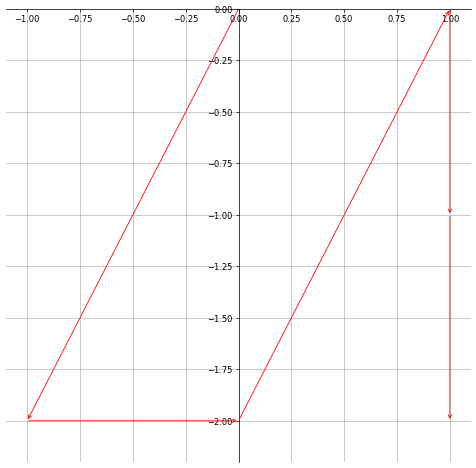

In [72]:
def arrow(filePath):
    fileDir, name = os.path.split(filePath)
    data = pd.read_csv(filePath)
    x = data["X"].values
    y = data["Y"].values
    plt.figure(figsize=(10,10), dpi=60)
    ax = plt.subplot(111)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))


    plt.xlim(x.min()*1.1, x.max()*1.1)

    plt.ylim(y.min()*1.1, y.max()*1.1)


    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        dy = y[i+1] - y[i]
        head_length = (dx + dy) / 20
#         plt.arrow(x[i],y[i],dx,dy,length_includes_head=True,head_width=head_length,head_length=head_length,overhang=0.6,color = 'blue')
        plt.annotate("", xy=(x[i], y[i]), xytext=(x[i+1], y[i+1]), arrowprops=dict(arrowstyle="<-", color="r"))
        plt.grid()
        
    figSavePath = filePath[:-4] + ".jpg"
    print("figSavePath: {}".format(figSavePath))
    plt.savefig(figSavePath, format='png', transparent=True, dpi=300, pad_inches = 0)
    plt.show()

fileName = "SSSM-000020"
resultDir = "results/s1/"
resultPath = os.path.join(resultDir, fileName, "raw_trajectory.csv")
standardPath = os.path.join(resultDir, fileName, "standard.csv")
# arrow(resultPath)
# print(standardPath)
arrow(standardPath)

In [6]:
resultPath = "results/s1/track/double_hand/"
for roots, dirs, fileNames in os.walk(resultPath):
    dirs.sort()
    for videoName in dirs:
        if(videoName != "SSSM-B3-00065"):
            continue
        print(videoName)
        print(roots)
#         if (myDict.get(videoName) != 1):
#             continue
        filePath = os.path.join(roots, videoName, "raw_trajectory.csv")
        standardPath = os.path.join(roots, videoName, "standardS.csv")
        arrow(filePath)
        arrow(standardPath)

figSavePath: results/s1/track/double_hand/SSSM-B3-00034/dp.jpg


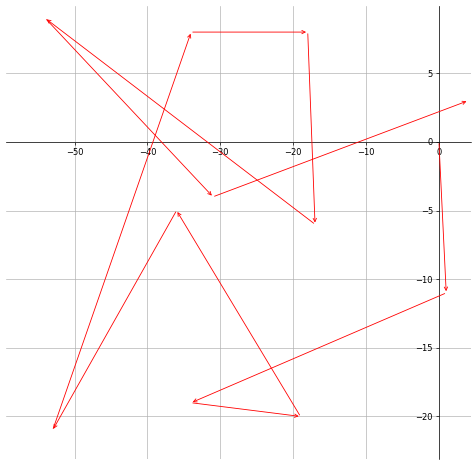

[{'frame': 0, 'X': 0, 'Y': 0},
 {'frame': 16, 'X': 1, 'Y': -11},
 {'frame': 39, 'X': -34, 'Y': -19},
 {'frame': 69, 'X': -19, 'Y': -20},
 {'frame': 122, 'X': -36, 'Y': -5},
 {'frame': 171, 'X': -53, 'Y': -21},
 {'frame': 206, 'X': -34, 'Y': 8},
 {'frame': 232, 'X': -18, 'Y': 8},
 {'frame': 250, 'X': -17, 'Y': -6},
 {'frame': 283, 'X': -54, 'Y': 9},
 {'frame': 289, 'X': -31, 'Y': -4},
 {'frame': 293, 'X': 4, 'Y': 3}]

In [7]:
def dp(filePath):
    dir = str(filePath).rsplit("/",1)[0]
    data = pd.read_csv(filePath)
    x = data["X"].values
    y = data["Y"].values

    points = []

    for i in range(len(x)):
        point = [x[i],y[i]]
        points.append(point)

    mask = rdp(points, algo = 'iter', return_mask = True, epsilon = 8)

    rows = []
    for i in range(len(points)):
        if mask[i] == True:
            row = {"frame":i,"X":points[i][0],"Y":points[i][1]}
            rows.append(row)

    with open(dir+"/dp.csv","w") as f:
        rst_csv = csv.DictWriter(f,["frame","X","Y"])
        rst_csv.writeheader()
        rst_csv.writerows(rows)
    arrow(dir+"/dp.csv")

    return rows
# Path of csv
file = "results/s1/track/double_hand/SSSM-B3-00034/raw_trajectory.csv"
dp(file)


In [8]:
resultPath = "results/s1/"
for roots, dirs, name in os.walk(resultPath):
    dirs.sort()
    for videoName in dirs:
        if (myDict.get(videoName) != 1):
            continue
        if(videoName != "SSSM-000098"):
            continue
        test = pd.read_csv(os.path.join(roots, videoName, "dp.csv"))
        print(os.path.join(roots, videoName, "dp.csv"))
        test['score'] = 1
        test.to_csv(os.path.join(roots, videoName, "dp.csv"))

results/s1/SSSM-000098/dp.csv


In [9]:
file = "standardPattern.txt"
def removeRedundant(inList):
    pairs = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 4, 7], [2, 5, 8], [3, 6, 9], [1, 5, 9], [7, 5, 3], [3, 2, 1], [6, 5, 4], [9, 8, 7], [7, 4, 1], [8, 5, 2],[9, 6, 3], [9, 5, 1], [3, 5, 7]])
    i = 0
    while(i < len(inList)-2):
        for pair in pairs:
            if (inList[i:i+3] == pair).all():
                inList = np.delete(inList, i+1)
                break
        i = i + 1
    return inList

def pat(stFilePath):
    f = open(stFilePath)   
    pats = f.readlines()

    passwordMap = [ (-1,1),(0,1),(1,1),
                    (-1,0),(0,0),(1,0),
                    (-1,-1),(0,-1),(1,-1)]
    for pat in pats:
#         print(pat)
        name = pat.split("\t")[0]
        if(name != 'SSSM-B3-00080'):
            continue
        print(name)
        pat = pat.split("\t")[1].split("-->")
        pat = removeRedundant(list(map(int, pat)))
        print(pat)
        temp = []
        x = []
        y = []
        firstX = passwordMap[int(pat[0])-1][0]
        firstY = passwordMap[int(pat[0])-1][1]
        for p in pat:
            x.append(passwordMap[int(p)-1][0] - firstX)
            y.append(passwordMap[int(p)-1][1] - firstY)
        dataframe = pd.DataFrame({'X':x,'Y':y})
        resultDir = "results/s1/track/double_hand"
        if(name in os.listdir(resultDir)):
            path = os.path.join(resultDir, name, "standardS.csv")
            print(path)
            dataframe.to_csv(path)
            print("sucess save")
        else:
            print("file path don't exist.")
#         elif(name in os.listdir("results/s2/")):
#             dataframe.to_csv(os.path.join("results/s2", name, "standardS.csv"))
pat(file)

SSSM-B3-00080
[3 4 1 6 9 7 2 5]
results/s1/track/double_hand/SSSM-B3-00080/standardS.csv
sucess save


In [60]:
# 把结果保存到总表中
def getData(resultPath):
    videoName = resultPath.split("/")[-1]
    dpCsvPath = os.path.join(resultPath, "dp.csv")
    StandardCsvPath = os.path.join(resultPath, "standardS.csv")
    
    try: data = pd.read_csv(dpCsvPath)
    except(IOError): print("no dp.csv found.")
    try: dataS = pd.read_csv(StandardCsvPath,index_col=0)
    except(IOError): print("no standard.csv found.")
        
    assert len(data) == len(dataS)

    # 实际值
    distance = []
    angle = []
    time = []
    # 准确值（理论值）
    
    shortStD = []
    standardD = []
    intStA = []
    stA = []
    #处理距离
    for i in range(len(data) - 1):
        t = data['frame'][i + 1] - data['frame'][i]
        d = math.sqrt(abs(data['X'][i+1]-data['X'][i])**2 + abs(data['Y'][i+1]-data['Y'][i])**2)
        sd = math.sqrt(abs(dataS['X'][i+1]-dataS['X'][i])**2 + abs(dataS['Y'][i+1]-dataS['Y'][i])**2)
        distance.append(d)
        standardD.append(sd)
        shortStD.append(str(round(sd, 3)))
        time.append(t)
    #处理角度
    for i in range(len(data) - 2):
        firstPoint = [data['X'][i], data['Y'][i]]
        secondPoint = [data['X'][i+1], data['Y'][i+1]]
        thirdPoint = [data['X'][i+2], data['Y'][i+2]]
        angle.append(cal_ang(firstPoint, secondPoint, thirdPoint)[1])
        firstPoint = [dataS['X'][i], dataS['Y'][i]]
        secondPoint = [dataS['X'][i+1], dataS['Y'][i+1]]
        thirdPoint = [dataS['X'][i+2], dataS['Y'][i+2]]
        stA.append(cal_ang(firstPoint, secondPoint, thirdPoint)[1])
        intStA.append(str(cal_ang(firstPoint, secondPoint, thirdPoint)[0]))
        
    angle.append(-1)
    intStA.append(-1)
    stA.append(-1)
#     print(angle, stA)
    
    normD = list(map(lambda x:x / distance[0] * standardD[0], distance))
    return({"normD":normD,
            "stD":standardD,
            "shortStD": shortStD,
            "angle":angle,
            "stA": stA,
            "intStA": intStA})
# result = getData("./results/s1/SSSM-B3-00046/")
result

{'normD': [2.0, 1.0734801118613226, 2.088384139617695],
 'stD': [2.0, 2.0, 2.0],
 'shortStD': [2.0, 2.0, 2.0],
 'angle': [94.225762, 86.736065, -1],
 'stA': [90.0, 90.0, -1],
 'intStA': [90, 90, -1]}

In [64]:
file = "standardPattern.txt"
standardPath = "results/s1/"
resultPath = "results/s1/"
videoNames = []
routes = []
standardDs = []
shortStandardDs = []
actualDs = []
actualAs = []
standardAs = []
intStandardAs = []
f = open(file)   
pats = f.readlines()
for dirname in os.listdir(resultPath):
    if (myDict.get(dirname) != 1 or "000098" in dirname or "00058" in dirname):continue

    filePath = os.path.join(resultPath, dirname)
#     print(filePath)
    result = getData(filePath)
    for pat in pats:
        if pat.split("\t")[0] == dirname:
            route = pat.strip().split("\t")[1]
            break
    for i in range(len(result['normD'])):
        videoNames.append(dirname)
        routes.append(route)
        actualDs.append(result['normD'][i])
        standardDs.append(result['stD'][i])
        shortStandardDs.append(result['shortStD'][i])
        intStandardAs.append(result['intStA'][i])
        actualAs.append(result['angle'][i])
        standardAs.append(result['stA'][i])
            
            
# print(len(videoNames))
# print(len(routes))     
# print(len(standardDs))
# print(len(actualDs))
# print(len(standardAs))
# print(len(actualAs))
dataframe = pd.DataFrame({'video number':videoNames,
                          'route':routes,
                          'standard distances':standardDs,
                          'short standard distances': shortStandardDs,
                          'actual distances':actualDs,
                          'standard angles':standardAs,
                          'int standard angles': intStandardAs,
                          'actual angles':actualAs})
dataframe.to_csv("总表2.csv")
dataframe

,video number,route,standard distances,short standard distances,actual distances,standard angles,int standard angles,actual angles
0,SSSM-000116,2-->5-->8-->9-->6-->3,2.0,2.0,2.000000,90.0,90,98.130102
1,SSSM-000116,2-->5-->8-->9-->6-->3,1.0,1.0,1.697056,90.0,90,77.905243
2,SSSM-000116,2-->5-->8-->9-->6-->3,2.0,2.0,2.024846,-1.0,-1,-1.000000
3,SSSM-000188,1-->4-->7-->8-->9-->6-->3-->2,2.0,2.0,2.000000,90.0,90,99.729814
4,SSSM-000188,1-->4-->7-->8-->9-->6-->3-->2,2.0,2.0,2.444992,90.0,90,88.636072
...,...,...,...,...,...,...,...,...
436,SSSM-000164,3-->2-->1-->4-->7-->8-->9,2.0,2.0,0.978832,90.0,90,103.415736
437,SSSM-000164,3-->2-->1-->4-->7-->8-->9,2.0,2.0,1.777408,-1.0,-1,-1.000000
438,SSSM-000152,3-->2-->1-->4-->7-->8-->9,2.0,2.0,2.000000,90.0,90,94.225762
439,SSSM-000152,3-->2-->1-->4-->7-->8-->9,2.0,2.0,1.073480,90.0,90,86.736065


In [13]:

resultPath = os.path.join("总表.csv")
try:
    data = pd.read_csv(resultPath)
except(IOError):
    print("no 总表.csv found.")
print("spearman相关度")
print("距离相关度: {}".format(data['actual distances'].corr(data['standard distances'],method='spearman')))
print("角度相关度: {}".format(data['actual angles'].corr(data['standard angles'],method='spearman')))
print("距离和角度相关度: {}".format(data['actual distances'].corr(data['actual angles'],method='spearman')))
print("kendall相关度")
print("距离相关度: {}".format(data['actual distances'].corr(data['standard distances'],method='kendall')))
print("角度相关度: {}".format(data['actual angles'].corr(data['standard angles'],method='kendall')))
print("距离和角度相关度: {}".format(data['actual distances'].corr(data['actual angles'],method='kendall')))


spearman相关度
距离相关度: 0.810899157771851
角度相关度: 0.9785986046944151
距离和角度相关度: -0.08683646619110866
kendall相关度
距离相关度: 0.668591057705971
角度相关度: 0.905231902785451
距离和角度相关度: -0.05967547094477177


In [ ]:
# Test For Jason
for video_name in sorted(os.listdir("./results/no-end"))[:-1]:
    print(video_name)
    dp_path = f"./results/s1/{video_name}/dp.csv"
    opt_path = f"./results/no-end/{video_name}/opt_tra.csv"
    if os.path.exists(dp_path) and os.path.exists(opt_path):
        arrow(dp_path)
        arrow(opt_path)

In [63]:
type(result['shortStD'][0])

str